In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

MIMO Channel capacity Computation

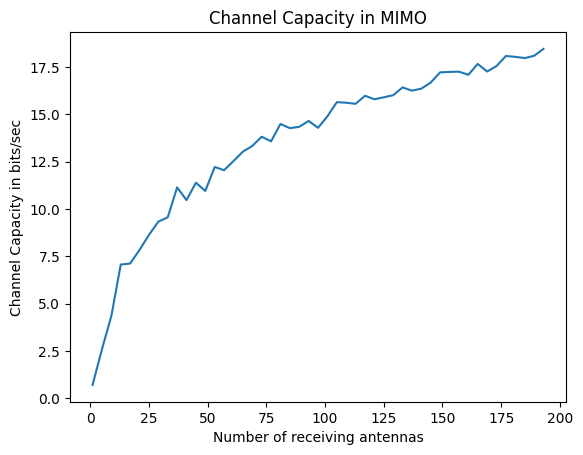

In [13]:

# Set up the MIMO communication system
rate = np.zeros((49,1))
count = 0
for i in range(1,197,4):


    n = 5#Number of transmit antennas
    m = i  #mber of receive antennas
    H = np.random.randn(m, n)  # Channel matrix

    # Find the channel capacity using convex optimization
    P_max = 1  # Maximum transmit power
    P = cp.Variable(n)  # Power allocation vector
    objective = cp.log_det(np.eye(m) + H @ cp.diag(P) @ H.T)
    constraints = [
        P >= 0,
        cp.sum(P) <= P_max
    ]
    problem = cp.Problem(cp.Maximize(objective), constraints)
    channel_capacity = problem.solve()
    rate[count] = channel_capacity
    count = count +1


    #print("Channel capacity:", channel_capacity)
#print(rate)
n = np.arange(1,197,4)
m = np.zeros((49,1))
m = n
#print(n)
plt.plot(m,rate)
plt.xlabel('Number of receiving antennas')
plt.ylabel('Channel Capacity in bits/sec')
plt.title('Channel Capacity in MIMO')
plt.show()



Channel Capacity of binary Symmetric channel

In [24]:
import cvxpy as cp
import numpy as np
import math
from scipy.special import xlogy

def channel_capacity(n, m, P, sum_x=1):

    # n is the number of different input values
    # m is the number of different output values
    if n*m == 0:
        print('The range of both input and output values must be greater than zero')
        return 'failed', np.nan, np.nan

    # x is probability distribution of the input signal X(t)
    x = cp.Variable(shape=n)

    # y is the probability distribution of the output signal Y(t)
    # P is the channel transition matrix
    y = P@x

    # I is the mutual information between x and y
    c = np.sum(np.array((xlogy(P, P) / math.log(2))), axis=0)
    I = c@x + cp.sum(cp.entr(y) / math.log(2))

    # Channel capacity maximised by maximising the mutual information
    obj = cp.Maximize(I)
    constraints = [cp.sum(x) == sum_x,x >= 0]

    # Form and solve problem
    prob = cp.Problem(obj,constraints)
    opt_value = prob.solve()
    print('channel capacity is',opt_value)
    if prob.status=='optimal':
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan

 
P = np.array([[0.9, 0.1], [0.1, 0.9]])
[a,b,c] = channel_capacity(2, 2, P, sum_x=1)



channel capacity is 0.531004408253743


Channel Capacity Calculation Using SVD

In [21]:
import numpy as np

# Define the number of antennas at the transmitter and receiver
ntx = 2 # number of transmit antennas
nrx = 5 # number of receive antennas

# Generate a random channel matrix with complex Gaussian entries
H = (1/np.sqrt(2)) * (np.random.randn(nrx, ntx) + 1j*np.random.randn(nrx, ntx))

# Compute the singular value decomposition (SVD) of the channel matrix
U, S, Vh = np.linalg.svd(H)

# Compute the signal-to-noise ratio (SNR)
snr_db = 20 # SNR in dB
snr = 10**(snr_db/10)

# Compute the channel capacity using the formula
capacity = np.sum(np.log2(1 + snr * S**2))

# Print the channel capacity
print("Channel capacity = {:.2f} bits/s/Hz".format(capacity))

Channel capacity = 16.99 bits/s/Hz
